# **AIRLINE REVIEW SENTIMENT ANALYSIS**


### **1. BUSINESS PROBLEM**


In today's highly competitive and customer-centric market, businesses receive a lot of customer feedback through reviews across many different platforms. However, manually analyzing this data is time-consuming and often inconsistent. Our application addresses this problem by using sentiment analysis to automatically categorize customer reviews as positive, negative, or neutral. This enables businesses to quickly identify areas of improvement, monitor brand perception in real-time, and make data-driven decisions to enhance customer satisfaction and loyalty

### **3. DATA UNDERSTANDING**

##### **LOADING THE DATA**

In [22]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud

df = pd.read_csv('Tweets.csv')
df.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


##### **BASE UNDERSTANDING OF THE DATA**

In [23]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


##### **MISSING VALUES HEATMAP**

Text(0.5, 1.0, 'Missing Values Heatmap')

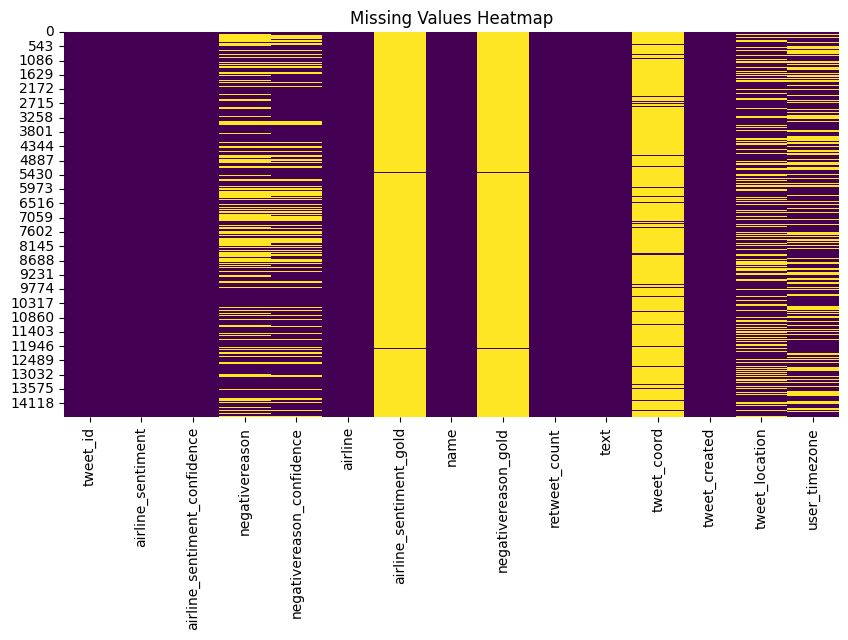

In [24]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")


##### **MISSING VALUES PER COLUMN**

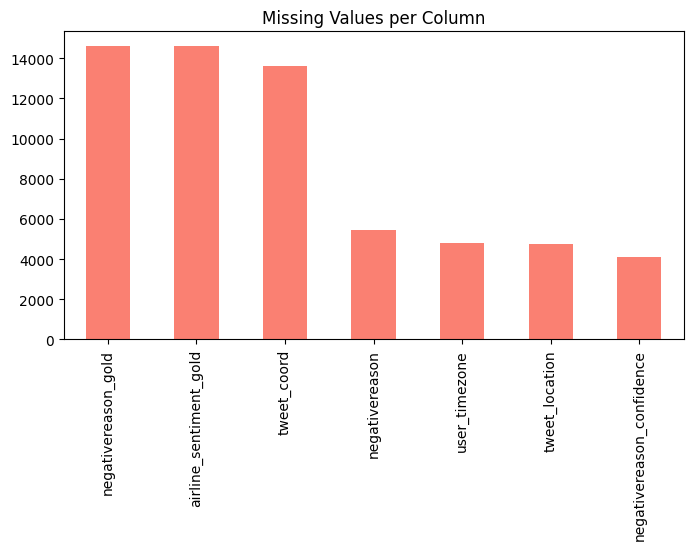

In [25]:
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0].plot(kind='bar', figsize=(8,4), color='salmon', title='Missing Values per Column')
plt.show()

##### **UNIQUE VALUES PER FEATURE**

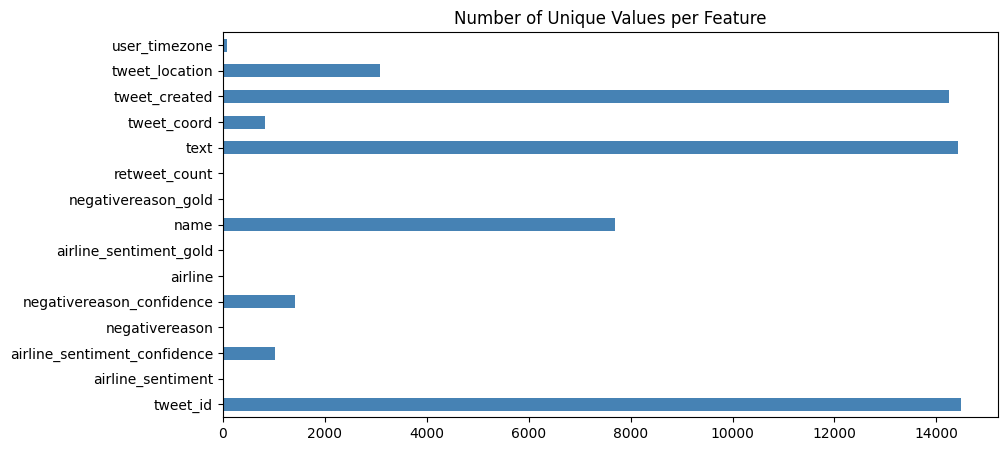

In [26]:
df.nunique().plot(kind='barh', figsize=(10,5), color='steelblue', title='Number of Unique Values per Feature')
plt.show()


##### **SENTIMENT DISTRIBUTION**


Sentiment Percentages:
 airline_sentiment
negative    62.691257
neutral     21.168033
positive    16.140710
Name: proportion, dtype: float64


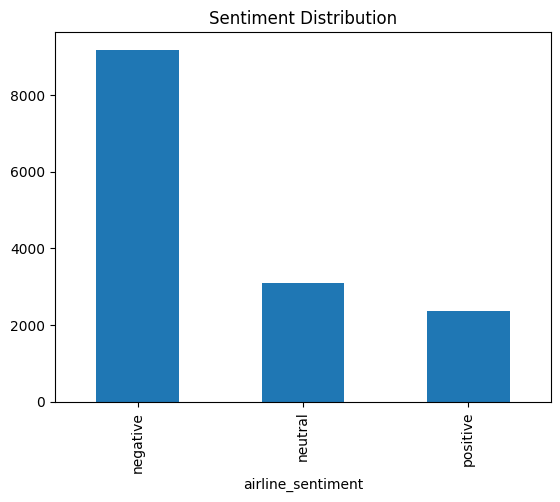

In [27]:
df['airline_sentiment'].value_counts().plot(kind='bar', title='Sentiment Distribution')
# Percentage of each sentiment
sentiment_percent = df['airline_sentiment'].value_counts(normalize=True) * 100
print("\nSentiment Percentages:\n", sentiment_percent)


##### **DISTRIBUTION OF TWEET LENGTH**

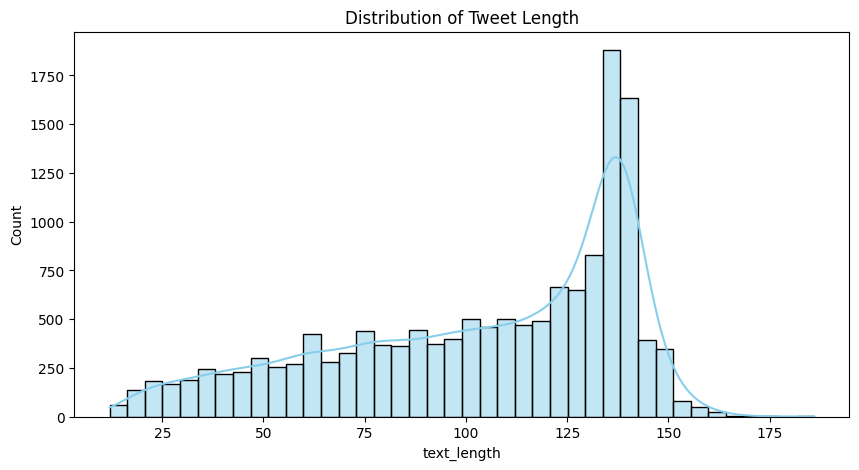

In [28]:
df['text_length'] = df['text'].apply(len)
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10,5))
sns.histplot(df['text_length'], bins=40, kde=True, color='skyblue')
plt.title('Distribution of Tweet Length')
plt.show()



##### **WORD COUNT DISTRIBUTION BY SENTIMENT**

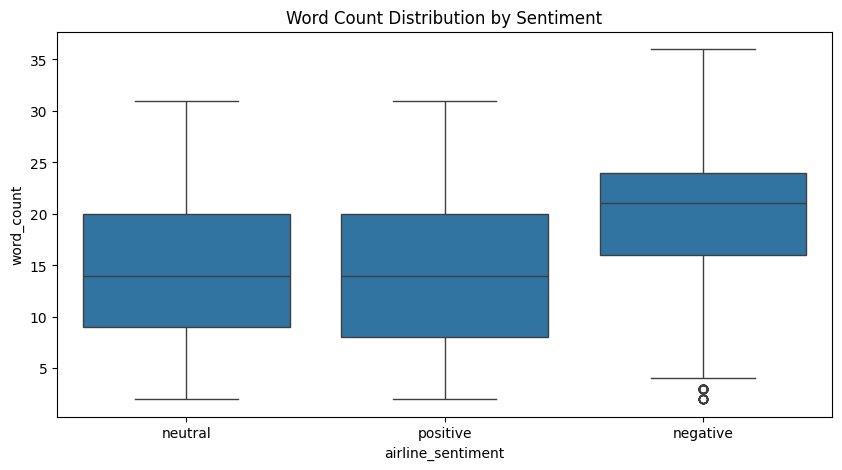

In [29]:
plt.figure(figsize=(10,5))
sns.boxplot(x='airline_sentiment', y='word_count', data=df)
plt.title('Word Count Distribution by Sentiment')
plt.show()


##### **SENTIMENT COUNT BY AIRLINE**

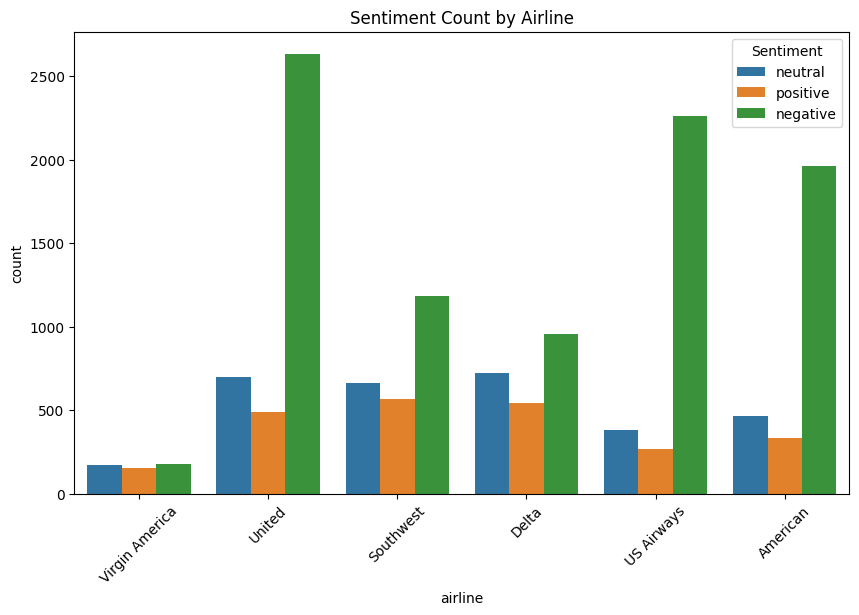

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(x='airline', hue='airline_sentiment', data=df)
plt.title('Sentiment Count by Airline')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()


##### **REASONS FOR NEGATIVE SENTIMENT**

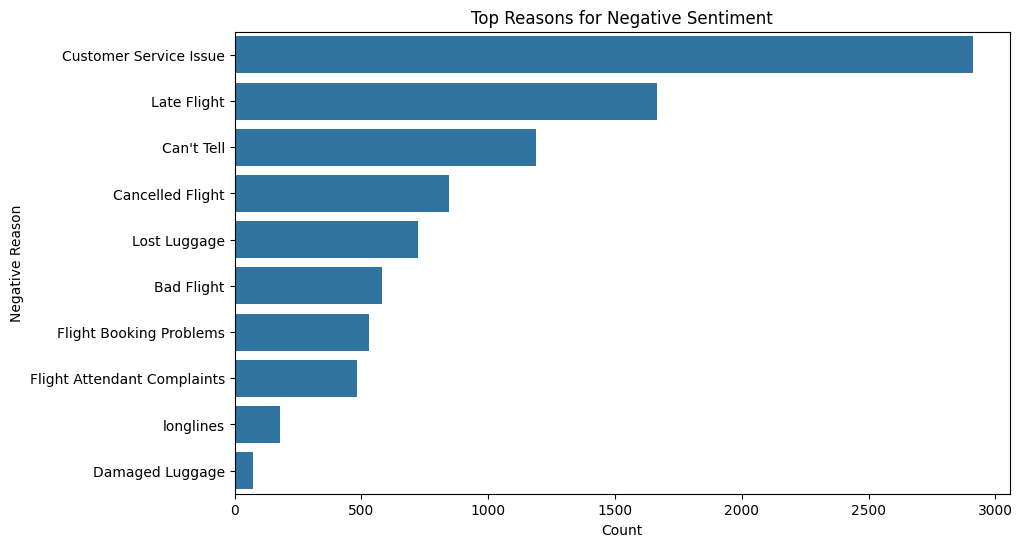

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(y='negativereason', data=df[df['airline_sentiment'] == 'negative'], order =df['negativereason'].value_counts().index)
plt.title('Top Reasons for Negative Sentiment')
plt.xlabel('Count')
plt.ylabel('Negative Reason')
plt.show()


##### **SENTIMENT OVER TIME**

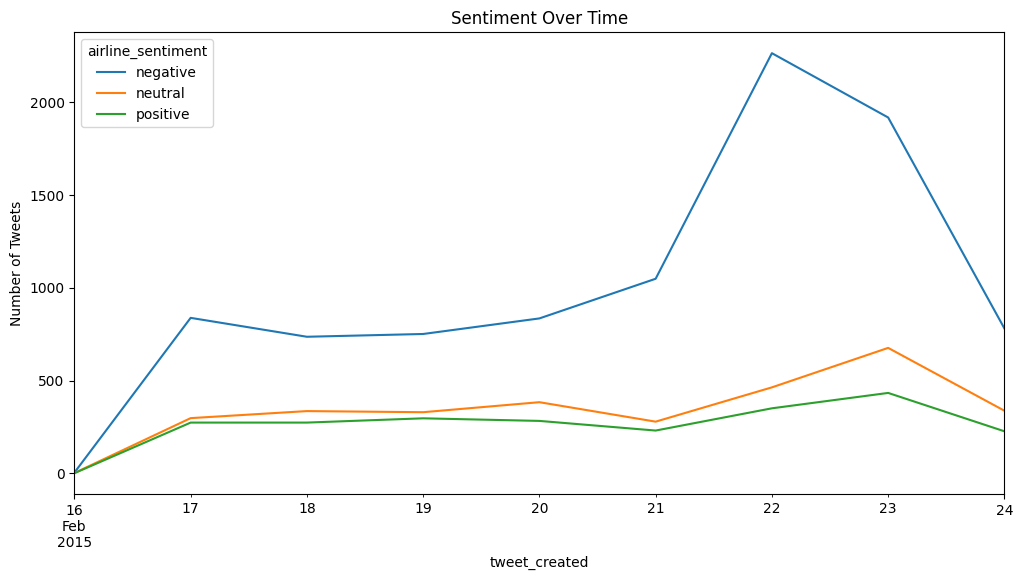

In [32]:
if 'tweet_created' in df.columns:
    df['tweet_created'] = pd.to_datetime(df['tweet_created'])
    
    df.set_index('tweet_created', inplace=True)
    sentiment_over_time = df.resample('D')['airline_sentiment'].value_counts().unstack().fillna(0)
    sentiment_over_time.plot(figsize=(12,6))
    plt.title('Sentiment Over Time')
    plt.ylabel('Number of Tweets')
    plt.show()


##### **TWEET ACTIVITY OVER TIME**

In [33]:
# Tweet Activity Over Time
if 'tweet_created' in df.columns:
    df['tweet_created'] = pd.to_datetime(df['tweet_created'])
    df.set_index('tweet_created', inplace=True)
    
    df['airline_sentiment'].resample('H').count().plot(figsize=(12,5), title='Tweet Volume Over Time')
    plt.ylabel('Tweet Count')
    plt.xlabel('Time')
    plt.show()



##### **TOP TWEET LOCATIONS**

C:\Users\marcu\AppData\Local\Temp\ipykernel_20528\4073625869.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_locations.index, x=top_locations.values, palette='coolwarm')


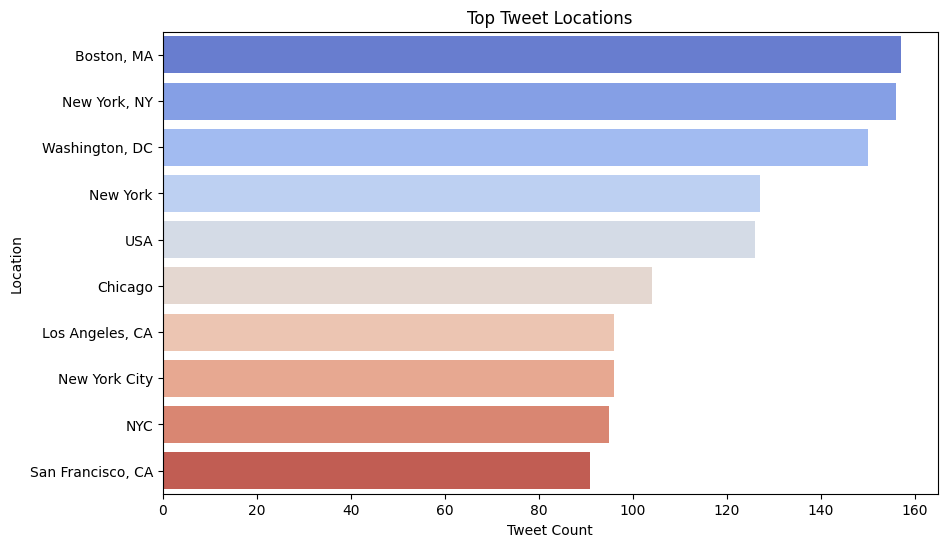

In [34]:
# Geographical Distribution of Tweets
# Filter valid locations
geo_df = df[['tweet_location', 'airline_sentiment']].dropna().copy()
top_locations = geo_df['tweet_location'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=top_locations.index, x=top_locations.values, palette='coolwarm')
plt.title("Top Tweet Locations")
plt.xlabel("Tweet Count")
plt.ylabel("Location")
plt.show()


### **4. DATA PREPARATION & TRAINING**

In [35]:
import pandas as pd
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords', download_dir='C:\\Users\\marcu\\AppData\\Roaming\\nltk_data')
nltk.download('punkt', download_dir='C:\\Users\\marcu\\AppData\\Roaming\\nltk_data')
nltk.download('wordnet', download_dir='C:\\Users\\marcu\\AppData\\Roaming\\nltk_data')
nltk.download('omw-1.4', download_dir='C:\\Users\\marcu\\AppData\\Roaming\\nltk_data')  # Needed for lemmatization


df = pd.read_csv("Tweets.csv")

# Keep only relevant columns
df = df[['airline_sentiment', 'text']]

# Load stopwords once
stop_words = set(stopwords.words('english'))

lemmatizer = WordNetLemmatizer()

# stemmer = PorterStemmer()

def clean_text(text):
    try:
        text = str(text).lower()
        text = re.sub(r"http\S+|www\S+|https\S+", '', text)
        text = re.sub(r'\@\w+|\#','', text)
        text = re.sub(r'[^\w\s]', '', text)
        tokens = text.split()
        tokens = [word for word in tokens if word not in stop_words]
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
        return ' '.join(tokens)
    except Exception as e:
        print(f"Error cleaning text: {text} -> {e}")
        return ""

try:
    df['clean_text'] = df['text'].apply(clean_text)
except Exception as e:
    print("Error:", e)

# Encode labels
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['airline_sentiment'])

# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), lowercase=False)

# Added bi-grams to help the model understand context better
# A bi-gram is a sequence of two adjacent elements from a string of tokens, which can help capture context better than unigrams alone.
X = vectorizer.fit_transform(df['clean_text']).toarray()

# Define features and labels
y = df['sentiment_encoded']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marcu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marcu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\marcu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\marcu\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### **5. EVALUATING DIFFERENT TYPES OF MODELS**

##### **LOGISTIC REGRESSION**


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train Logistic Regression model
logreg = LogisticRegression(max_iter=1000, class_weight='balanced')
logreg.fit(X_train, y_train)

# Predictions
y_pred_logreg = logreg.predict(X_test)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))


Logistic Regression Accuracy: 0.7663934426229508
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.80      0.85      1889
           1       0.53      0.68      0.59       580
           2       0.67      0.75      0.71       459

    accuracy                           0.77      2928
   macro avg       0.70      0.74      0.72      2928
weighted avg       0.79      0.77      0.77      2928



##### **TRAINING A MODEL USING RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


##### **COMPARING XGBOOST & LOGISTIC REGRESSION**

In [43]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, scale_pos_weight=3)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate Logistic Regression
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))

# Evaluate XGBoost
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

c:\Users\marcu\OneDrive\MarcusOneDrive\IT Projects\PROJECT 2 - FINAL\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:52:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Logistic Regression Accuracy: 0.7663934426229508
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.80      0.85      1889
           1       0.53      0.68      0.59       580
           2       0.67      0.75      0.71       459

    accuracy                           0.77      2928
   macro avg       0.70      0.74      0.72      2928
weighted avg       0.79      0.77      0.77      2928

XGBoost Accuracy: 0.7612704918032787
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.94      0.85      1889
           1       0.66      0.30      0.41       580
           2       0.73      0.61      0.67       459

    accuracy                           0.76      2928
   macro avg       0.72      0.62      0.64      2928
weighted avg       0.75      0.76      0.73      2928



##### **TRAINING USING VADER**

In [39]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon', download_dir='C:\\Users\\marcu\\AppData\\Roaming\\nltk_data')
sia = SentimentIntensityAnalyzer()

# VADER prediction function
def get_vader_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'
    
    # Get the original text of your test set (aligning indexes with y_test)
X_test_text = df.loc[y_test.index, 'text']

# Get VADER predictions for each tweet
vader_preds = X_test_text.apply(get_vader_sentiment)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\marcu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


##### **COMPARING VADER & LOGISTIC REGRESSION**

In [40]:
from sklearn.metrics import classification_report, accuracy_score

# Decode your model's predictions (you already trained your ML model above)
ml_preds_labels = label_encoder.inverse_transform(y_pred_logreg)
y_test_labels = label_encoder.inverse_transform(y_test)

# Compare results
print("ML Model Accuracy:", accuracy_score(y_test_labels, ml_preds_labels))
print("ML Classification Report:\n", classification_report(y_test_labels, ml_preds_labels))

print("\nVADER Accuracy:", accuracy_score(y_test_labels, vader_preds))
print("VADER Classification Report:\n", classification_report(y_test_labels, vader_preds))


ML Model Accuracy: 0.7663934426229508
ML Classification Report:
               precision    recall  f1-score   support

    negative       0.90      0.80      0.85      1889
     neutral       0.53      0.68      0.59       580
    positive       0.67      0.75      0.71       459

    accuracy                           0.77      2928
   macro avg       0.70      0.74      0.72      2928
weighted avg       0.79      0.77      0.77      2928


VADER Accuracy: 0.5502049180327869
VADER Classification Report:
               precision    recall  f1-score   support

    negative       0.90      0.51      0.65      1889
     neutral       0.36      0.43      0.39       580
    positive       0.34      0.88      0.49       459

    accuracy                           0.55      2928
   macro avg       0.54      0.60      0.51      2928
weighted avg       0.71      0.55      0.57      2928



##### **TRAINING AN MLP TO COMPARE WITH LOGISTIC REGRESSION**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)  # You can tune the hidden_layer_sizes
mlp.fit(X_train, y_train)

# Predictions
y_pred_mlp = mlp.predict(X_test)

# Evaluate MLP
print("MLP Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("MLP Classification Report:\n", classification_report(y_test, y_pred_mlp))

# Compare the results with Logistic Regression (already done in your code)
print("\nML Model Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("ML Classification Report:\n", classification_report(y_test, y_pred_logreg))



##### **SAVING THE MODEL FILE**

In [42]:
best_model = LogisticRegression()
best_model.fit(X_train, y_train)

# Save the model and vectorizer
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)